## V5589 Sgr Spectral Index

In [1]:
#imports
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy
import platform


from sympy import diff as dif

import astropy
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling.powerlaws import BrokenPowerLaw1D, SmoothlyBrokenPowerLaw1D, PowerLaw1D
from astropy.modeling import fitting, models

In [2]:
print("Astropy:", astropy.__version__)
print("NumPy:", np.__version__)
print("SciPy:", scipy.__version__)
print("Python:", platform.python_version())

Astropy: 7.0.0
NumPy: 2.1.3
SciPy: 1.15.2
Python: 3.11.11


### Importing the data and putting it in a large dataframe

In [3]:
data = ([56040.4,	1,	33,	0.032,	0.025,	1.00E-10,	0.05],
    [56069.0,	'A',	225.3,	13.80,	2.000,	1.00E-10,	0.05],
    [56084.4,	2,	5,	1.089,	0.028,	1.00E-10,	0.05],
    [56084.4,	2,	6.8,	1.381,	0.025,	1.00E-10,	0.05],
    [56092.2,	3,	13.3,	3.523,	0.042,	1.00E-10,	0.05],
    [56092.2,	3,	16,	3.98,	0.049,	1.00E-10,	0.05],
    [56092.2,	3,	28.2,	5.727,	0.098,	1.00E-10,	0.05],
    [56092.2,	3,	36.5,	5.961,	0.139,	1.00E-10,	0.05],
    [56100.3,	4,	2.5,	3.094,	0.037,	1.00E-10,	0.05],
    [56100.3,	4,	3.5,	3.201,	0.030,	1.00E-10,	0.05],
    [56100.3,	4,	5,	3.423,	0.023,	1.00E-10,	0.05],
    [56100.3,	4,	6.8,	3.629,	0.025,	1.00E-10,	0.05],
    [56100.3,	4,	8.5,	3.683,	0.052,	1.00E-10,	0.05],
    [56100.3,	4,	11.4,	3.779,	0.071,	1.00E-10,	0.05],
    [56117.9,	'B',	225.5,	0.000,	0.068,	1.00E-10,	0.05],
    [56119.1,	5,	1.35,	1.68,	0.120,	1.00E-10,	0.05],
    [56119.1,	5,	1.84,	1.391,	0.066,	1.00E-10,	0.05],
    [56119.1,	5,	4.74,	1.907,	0.027,	1.00E-10,	0.05],
    [56119.1,	5,	7.59,	1.921,	0.023,	1.00E-10,	0.05],
    [56128.3,	6,	17.5,	1.374,	0.091,	1.00E-10,	0.05],
    [56128.3,	6,	27.5,	1.438,	0.143,	1.00E-10,	0.05],
    [56128.3,	6,	36.5,	1.136,	0.194,	1.00E-10,	0.05],
    [56148.0,	7,	1.2555,	0.340,	0.071,	1.00E-10,	0.05],
    [56148.0,	7,	1.7715,	0.560,	0.072,	1.00E-10,	0.05],
    [56148.0,	7,	4.74,	0.521,	0.033,	1.00E-10,	0.05],
    [56148.0,	7,	7.59,	0.528,	0.025,	1.00E-10,	0.05],
    [56148.0,	7,	8.53,	0.556,	0.031,	1.00E-10,	0.05],
    [56148.0,	7,	11.38,	0.571,	0.060,	1.00E-10,	0.05],
    [56150.2,	8,	13.3,	0.495,	0.042,	1.00E-10,	0.05],
    [56150.2,	8,	17.45,	0.38,	0.049,	1.00E-10,	0.05],
    [56150.2,	8,	27.5,	0.469,	0.078,	1.00E-10,	0.05],
    [56150.2,	8,	36.5,	0.39,	0.086,	1.00E-10,	0.05],
    [56151.3,	8,	1.25,	0,	0.091,	1.00E-10,	0.05],
    [56151.3,	8,	1.80,	0.497,	0.088,	1.00E-10,	0.05],
    [56151.3,	8,	4.549,	0.502,	0.034,	1.00E-10,	0.05],
    [56151.3,	8,	7.399,	0.469,	0.025,	1.00E-10,	0.05],
    [56151.3,	8,	8.51,	0.443,	0.021,	1.00E-10,	0.05],
    [56151.3,	8,	11.34,	0.418,	0.035,	1.00E-10,	0.05],
    
#S4322
    [56167.0,	9,	1.36,	0.244,	0.049,	1.00E-10,	0.05],
    [56167.0,	9,	1.78,	0.431,	0.048,	1.00E-10,	0.05],

#12A-479
#56167.0	9	1.3835	0	0.075	1.00E-10	0.05
#56167.0	9	1.8035	0	0.029	1.00E-10	0.05
    [56167.0,	9,	4.608,	0.347,	0.028,	1.00E-10,	0.05],
    [56167.0,	9,	7.458,	0.292,	0.016,	1.00E-10,	0.05],
    [56167.0,	9,	8.5,	0.289,	0.018,	1.00E-10,	0.05],
    [56167.0,	9,	11.4,	0.368,	0.031,	1.00E-10,	0.05],

#12A-483
#56167.0	9	1.2555	0	0.086	1.00E-10	0.05
#56167.0	9	1.7395	0.346	0.093	1.00E-10	0.05
#56167.0	9	4.5490	0.282	0.036	1.00E-10	0.05
#56167.0	9	7.399	0.286	0.024	1.00E-10	0.05

    [56174.2,	10,	13.3,	0.188,	0.019,	1.00E-10,	0.05],
    [56174.2,	10,	17.45,	0.110,	0.029,	1.00E-10,	0.05],
    [56174.2,	10,	27.5,	0.106,	0.027,	1.00E-10,	0.05],
    [56174.2,	10,	36.5,	0.365,	0.131,	1.00E-10,	0.05],
    [56177.9,	11,	1.33,	0.225,	0.044,	1.00E-10,	0.05],
    [56177.9,	11,	1.77,	0.201,	0.042,	1.00E-10,	0.05],
    [56231.0,	12,	13.3,	0.035,	0.021,	1.00E-10,	0.05],
    [56231.0,	12,	17.4,	0.043,	0.027,	1.00E-10,	0.05],
    [56231.0,	12,	27.5,	0.060,	0.044,	1.00E-10,	0.05],
    [56231.0,	12,	36.5,	0.044,	0.052,	1.00E-10,	0.05],
    [56270.8,	13,	1.2555,	0,	0.083,	1.00E-10,	0.05],
    [56270.8,	13,	1.7395,	0,	0.084,	1.00E-10,	0.05],
    [56270.8,	13,	4.549,	0,	0.021,	1.00E-10,	0.05],
    [56270.8,	13,	7.399,	0,	0.016,	1.00E-10,	0.05],
    [56270.8,	13,	8.519,	0,	0.025,	1.00E-10,	0.05],
    [56270.8,	13,	11.399,	0,	0.030,	1.00E-10,	0.05],
    [56284.6,	14,	13.299,	0,	0.029,	1.00E-10,	0.05],
    [56284.6,	14,	17.449,	0,	0.035,	1.00E-10,	0.05],
    [56284.6,	14,	13.30,	0.047,	0.022,	1.00E-10,	0.05],
    [56284.6,	14,	17.45,	0.049,	0.026,	1.00E-10,	0.05],
    [56284.6,	14,	27.50,	0.036,	0.050,	1.00E-10,	0.05],
    [56284.6,	14,	36.50,	0.020,	0.068,	1.00E-10,	0.05],
    [56297.7,	15,	1.26,	0.0504,	0.102,	1.00E-10,	0.05],
    [56297.7,	15,	1.74,	-0.00249,	0.068,	1.00E-10,	0.05],
    [56297.7,	15,	4.55,	0.0328,	0.033,	1.00E-10,	0.05],
    [56297.7,	15,	7.399,	0.0288,	0.023,	1.00E-10,	0.05],
    [56297.7,	15,	8.52,	0.0286,	0.018,	1.00E-10,	0.05],
    [56297.7,	15,	11.4,	0.0413,	0.023,	1.00E-10,	0.05],
    [56347.7,	16,	1.26,	0.346,	0.503,	1.00E-10,	0.05],
    [56347.7,	16,	1.74,	-0.0272,	0.368,	1.00E-10,	0.05],
    [56347.7,	16,	4.55,	-0.232,	0.114,	1.00E-10,	0.05],
    [56347.7,	16,	7.399,	-0.00948,	0.160,	1.00E-10,	0.05],
    [56347.7,	16,	8.52,	0.465,	0.201,	1.00E-10,	0.05],
    [56347.7,	16,	11.4,	-0.0358,	0.301,	1.00E-10,	0.05],
    [56358.6,	17,	13.22,	0.025,	0.027,	1.00E-10,	0.05],
    [56358.6,	17,	17.45,	0.009,	0.025,	1.00E-10,	0.05],
    [56358.6,	17,	27.50,	0.046,	0.049,	1.00E-10,	0.05],
    [56358.6,	17,	36.50,	0.120,	0.062,	1.00E-10,	0.05],
    [56369.6,	17,	13.3,	-0.0319,	0.023,	1.00E-10,	0.05],
    [56369.6,	17,	17.4,	0.0240,	0.029,	1.00E-10,	0.05],
    [56369.6,	17,	27.5,	0.113,	0.065,	1.00E-10,	0.05],
    [56369.6,	17,	36.5,	0.0109,	0.083,	1.00E-10,	0.05],
    [56441.4,	18,	1.26,	0.0811,	0.396,	1.00E-10,	0.05],
    [56441.4,	18,	1.74,	-0.202,	0.326,	1.00E-10,	0.05],
    [56441.4,	18,	4.55,	0.0437,	0.033,	1.00E-10,	0.05],
    [56441.4,	18,	7.399,	-0.0098,	0.021,	1.00E-10,	0.05],
    [56441.4,	18,	8.52,	-0.00263,	0.018,	1.00E-10,	0.05],
    [56441.4,	18,	11.4,	-0.0266,	0.019,	1.00E-10,	0.05],
    [56446.2,	18,	13.3,	-0.0169,	0.024,	1.00E-10,	0.05],
    [56446.2,	18,	17.4,	0.0260,	0.029,	1.00E-10,	0.05],
    [56446.2,	18,	27.5,	0.112,	0.077,	1.00E-10,	0.05],
    [56446.2,	18,	36.5,	-0.0663,	0.095,	1.00E-10,	0.05],
    [56526.7,	19,	1.26,	-0.571,	0.276,	1.00E-10,	0.05],
    [56526.7,	19,	1.74,	-0.348,	0.169,	1.00E-10,	0.05],
    [56526.7,	19,	4.55,	-0.00306,	0.028,	1.00E-10,	0.05],
    [56526.7,	19,	7.40,	-0.0045,	0.019,	1.00E-10,	0.05],
    [56526.7,	19,	8.52,	0.00449,	0.022,	1.00E-10,	0.05],
    [56526.7,	19,	11.4,	-0.0051,	0.024,	1.00E-10,	0.05],
    [56530.7,	19,	13.3,	-0.00734,	0.031,	1.00E-10,	0.05],
    [56530.7,	19,	17.4,	-0.00912,	0.053,	1.00E-10,	0.05],
    [56530.7,	19,	27.5,	0.0271,	0.011,	1.00E-10,	0.05],
    [56530.7,	19,	36.5,	0.110,	0.110,	1.00E-10,	0.05],
       )

df =  pd.DataFrame(data, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

### now to seperate it into dataframe based on days

In [4]:
E1=(    [56040.4,	1,	33,	0.032,	0.025,	1.00E-10,	0.05],)

E2=(    [56069.0,	'A',	225.3,	13.80,	2.000,	1.00E-10,	0.05],)

E3=(    [56084.4,	2,	5,	1.089,	0.028,	1.00E-10,	0.05],
    [56084.4,	2,	6.8,	1.381,	0.025,	1.00E-10,	0.05],)

E4=(    [56092.2,	3,	13.3,	3.523,	0.042,	1.00E-10,	0.05],
    [56092.2,	3,	16,	3.98,	0.049,	1.00E-10,	0.05],
    [56092.2,	3,	28.2,	5.727,	0.098,	1.00E-10,	0.05],
    [56092.2,	3,	36.5,	5.961,	0.139,	1.00E-10,	0.05],)

E5=(
    [56100.3,	4,	2.5,	3.094,	0.037,	1.00E-10,	0.05],
    [56100.3,	4,	3.5,	3.201,	0.030,	1.00E-10,	0.05],
    [56100.3,	4,	5,	3.423,	0.023,	1.00E-10,	0.05],
    [56100.3,	4,	6.8,	3.629,	0.025,	1.00E-10,	0.05],
    [56100.3,	4,	8.5,	3.683,	0.052,	1.00E-10,	0.05],
    [56100.3,	4,	11.4,	3.779,	0.071,	1.00E-10,	0.05],)

E6 =(
    [56117.9,	'B',	225.5,	0.000,	0.068,	1.00E-10,	0.05],)

E7 =(
    [56119.1,	5,	1.35,	1.68,	0.120,	1.00E-10,	0.05],
    [56119.1,	5,	1.84,	1.391,	0.066,	1.00E-10,	0.05],
    [56119.1,	5,	4.74,	1.907,	0.027,	1.00E-10,	0.05],
    [56119.1,	5,	7.59,	1.921,	0.023,	1.00E-10,	0.05],)

E8 =(
    [56128.3,	6,	17.5,	1.374,	0.091,	1.00E-10,	0.05],
    [56128.3,	6,	27.5,	1.438,	0.143,	1.00E-10,	0.05],
    [56128.3,	6,	36.5,	1.136,	0.194,	1.00E-10,	0.05],)

E9 = (
    [56148.0,	7,	1.2555,	0.340,	0.071,	1.00E-10,	0.05],
    [56148.0,	7,	1.7715,	0.560,	0.072,	1.00E-10,	0.05],
    [56148.0,	7,	4.74,	0.521,	0.033,	1.00E-10,	0.05],
    [56148.0,	7,	7.59,	0.528,	0.025,	1.00E-10,	0.05],
    [56148.0,	7,	8.53,	0.556,	0.031,	1.00E-10,	0.05],
    [56148.0,	7,	11.38,	0.571,	0.060,	1.00E-10,	0.05],)

E10=(
    [56150.2,	8,	13.3,	0.495,	0.042,	1.00E-10,	0.05],
    [56150.2,	8,	17.45,	0.38,	0.049,	1.00E-10,	0.05],
    [56150.2,	8,	27.5,	0.469,	0.078,	1.00E-10,	0.05],
    [56150.2,	8,	36.5,	0.39,	0.086,	1.00E-10,	0.05],
    [56151.3,	8,	1.25,	0,	0.091,	1.00E-10,	0.05],
    [56151.3,	8,	1.80,	0.497,	0.088,	1.00E-10,	0.05],
    [56151.3,	8,	4.549,	0.502,	0.034,	1.00E-10,	0.05],
    [56151.3,	8,	7.399,	0.469,	0.025,	1.00E-10,	0.05],
    [56151.3,	8,	8.51,	0.443,	0.021,	1.00E-10,	0.05],
    [56151.3,	8,	11.34,	0.418,	0.035,	1.00E-10,	0.05],)

E11 = (
#S4322
    [56167.0,	9,	1.36,	0.244,	0.049,	1.00E-10,	0.05],
    [56167.0,	9,	1.78,	0.431,	0.048,	1.00E-10,	0.05],
#12A-479
#56167.0	9	1.3835	0	0.075	1.00E-10	0.05
#56167.0	9	1.8035	0	0.029	1.00E-10	0.05
    [56167.0,	9,	4.608,	0.347,	0.028,	1.00E-10,	0.05],
    [56167.0,	9,	7.458,	0.292,	0.016,	1.00E-10,	0.05],
    [56167.0,	9,	8.5,	0.289,	0.018,	1.00E-10,	0.05],
    [56167.0,	9,	11.4,	0.368,	0.031,	1.00E-10,	0.05],
#12A-483
#56167.0	9	1.2555	0	0.086	1.00E-10	0.05
#56167.0	9	1.7395	0.346	0.093	1.00E-10	0.05
#56167.0	9	4.5490	0.282	0.036	1.00E-10	0.05
#56167.0	9	7.399	0.286	0.024	1.00E-10	0.05
)

E12 = (
    [56174.2,	10,	13.3,	0.188,	0.019,	1.00E-10,	0.05],
    [56174.2,	10,	17.45,	0.110,	0.029,	1.00E-10,	0.05],
    [56174.2,	10,	27.5,	0.106,	0.027,	1.00E-10,	0.05],
    [56174.2,	10,	36.5,	0.365,	0.131,	1.00E-10,	0.05],)

E13= (
    [56177.9,	11,	1.33,	0.225,	0.044,	1.00E-10,	0.05],
    [56177.9,	11,	1.77,	0.201,	0.042,	1.00E-10,	0.05],)

E14 = (
    [56231.0,	12,	13.3,	0.035,	0.021,	1.00E-10,	0.05],
    [56231.0,	12,	17.4,	0.043,	0.027,	1.00E-10,	0.05],
    [56231.0,	12,	27.5,	0.060,	0.044,	1.00E-10,	0.05],
    [56231.0,	12,	36.5,	0.044,	0.052,	1.00E-10,	0.05],)

E15 = (
    [56270.8,	13,	1.2555,	0,	0.083,	1.00E-10,	0.05],
    [56270.8,	13,	1.7395,	0,	0.084,	1.00E-10,	0.05],
    [56270.8,	13,	4.549,	0,	0.021,	1.00E-10,	0.05],
    [56270.8,	13,	7.399,	0,	0.016,	1.00E-10,	0.05],
    [56270.8,	13,	8.519,	0,	0.025,	1.00E-10,	0.05],
    [56270.8,	13,	11.399,	0,	0.030,	1.00E-10,	0.05],)

E16 = (
    [56284.6,	14,	13.299,	0,	0.029,	1.00E-10,	0.05],
    [56284.6,	14,	17.449,	0,	0.035,	1.00E-10,	0.05],
    [56284.6,	14,	13.30,	0.047,	0.022,	1.00E-10,	0.05],
    [56284.6,	14,	17.45,	0.049,	0.026,	1.00E-10,	0.05],
    [56284.6,	14,	27.50,	0.036,	0.050,	1.00E-10,	0.05],
    [56284.6,	14,	36.50,	0.020,	0.068,	1.00E-10,	0.05],)

E17 = (
    [56297.7,	15,	1.26,	0.0504,	0.102,	1.00E-10,	0.05],
    [56297.7,	15,	1.74,	-0.00249,	0.068,	1.00E-10,	0.05],
    [56297.7,	15,	4.55,	0.0328,	0.033,	1.00E-10,	0.05],
    [56297.7,	15,	7.399,	0.0288,	0.023,	1.00E-10,	0.05],
    [56297.7,	15,	8.52,	0.0286,	0.018,	1.00E-10,	0.05],
    [56297.7,	15,	11.4,	0.0413,	0.023,	1.00E-10,	0.05],)

E18 = (
    [56347.7,	16,	1.26,	0.346,	0.503,	1.00E-10,	0.05],
    [56347.7,	16,	1.74,	-0.0272,	0.368,	1.00E-10,	0.05],
    [56347.7,	16,	4.55,	-0.232,	0.114,	1.00E-10,	0.05],
    [56347.7,	16,	7.399,	-0.00948,	0.160,	1.00E-10,	0.05],
    [56347.7,	16,	8.52,	0.465,	0.201,	1.00E-10,	0.05],
    [56347.7,	16,	11.4,	-0.0358,	0.301,	1.00E-10,	0.05],)

E19 = (
    [56358.6,	17,	13.22,	0.025,	0.027,	1.00E-10,	0.05],
    [56358.6,	17,	17.45,	0.009,	0.025,	1.00E-10,	0.05],
    [56358.6,	17,	27.50,	0.046,	0.049,	1.00E-10,	0.05],
    [56358.6,	17,	36.50,	0.120,	0.062,	1.00E-10,	0.05],)

E20 = (
    [56369.6,	17,	13.3,	-0.0319,	0.023,	1.00E-10,	0.05],
    [56369.6,	17,	17.4,	0.0240,	0.029,	1.00E-10,	0.05],
    [56369.6,	17,	27.5,	0.113,	0.065,	1.00E-10,	0.05],
    [56369.6,	17,	36.5,	0.0109,	0.083,	1.00E-10,	0.05],)

E21 = (
    [56441.4,	18,	1.26,	0.0811,	0.396,	1.00E-10,	0.05],
    [56441.4,	18,	1.74,	-0.202,	0.326,	1.00E-10,	0.05],
    [56441.4,	18,	4.55,	0.0437,	0.033,	1.00E-10,	0.05],
    [56441.4,	18,	7.399,	-0.0098,	0.021,	1.00E-10,	0.05],
    [56441.4,	18,	8.52,	-0.00263,	0.018,	1.00E-10,	0.05],
    [56441.4,	18,	11.4,	-0.0266,	0.019,	1.00E-10,	0.05],)

E22 = (
    [56446.2,	18,	13.3,	-0.0169,	0.024,	1.00E-10,	0.05],
    [56446.2,	18,	17.4,	0.0260,	0.029,	1.00E-10,	0.05],
    [56446.2,	18,	27.5,	0.112,	0.077,	1.00E-10,	0.05],
    [56446.2,	18,	36.5,	-0.0663,	0.095,	1.00E-10,	0.05],)

E23 = (
    [56526.7,	19,	1.26,	-0.571,	0.276,	1.00E-10,	0.05],
    [56526.7,	19,	1.74,	-0.348,	0.169,	1.00E-10,	0.05],
    [56526.7,	19,	4.55,	-0.00306,	0.028,	1.00E-10,	0.05],
    [56526.7,	19,	7.40,	-0.0045,	0.019,	1.00E-10,	0.05],
    [56526.7,	19,	8.52,	0.00449,	0.022,	1.00E-10,	0.05],
    [56526.7,	19,	11.4,	-0.0051,	0.024,	1.00E-10,	0.05],)

E24 = (
    [56530.7,	19,	13.3,	-0.00734,	0.031,	1.00E-10,	0.05],
    [56530.7,	19,	17.4,	-0.00912,	0.053,	1.00E-10,	0.05],
    [56530.7,	19,	27.5,	0.0271,	0.011,	1.00E-10,	0.05],
    [56530.7,	19,	36.5,	0.110,	0.110,	1.00E-10,	0.05],)

### Creating the dataframes

In [5]:
df1 =  pd.DataFrame(E1, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df2 =  pd.DataFrame(E2, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df3 =  pd.DataFrame(E3, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df4 =  pd.DataFrame(E4, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df5 =  pd.DataFrame(E5, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df6 =  pd.DataFrame(E6, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df7 =  pd.DataFrame(E7, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df8 =  pd.DataFrame(E8, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df9 =  pd.DataFrame(E9, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df10 =  pd.DataFrame(E10, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df11 =  pd.DataFrame(E11, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df12 =  pd.DataFrame(E12, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df13 =  pd.DataFrame(E13, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df14 =  pd.DataFrame(E14, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df15 =  pd.DataFrame(E15, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df16 =  pd.DataFrame(E16, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df17 =  pd.DataFrame(E17, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df18 =  pd.DataFrame(E18, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df19 =  pd.DataFrame(E19, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df20 =  pd.DataFrame(E20, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df21 =  pd.DataFrame(E21, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df22 =  pd.DataFrame(E22, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df23 =  pd.DataFrame(E23, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df24 =  pd.DataFrame(E24, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])


### making a loop to plot the spectral index

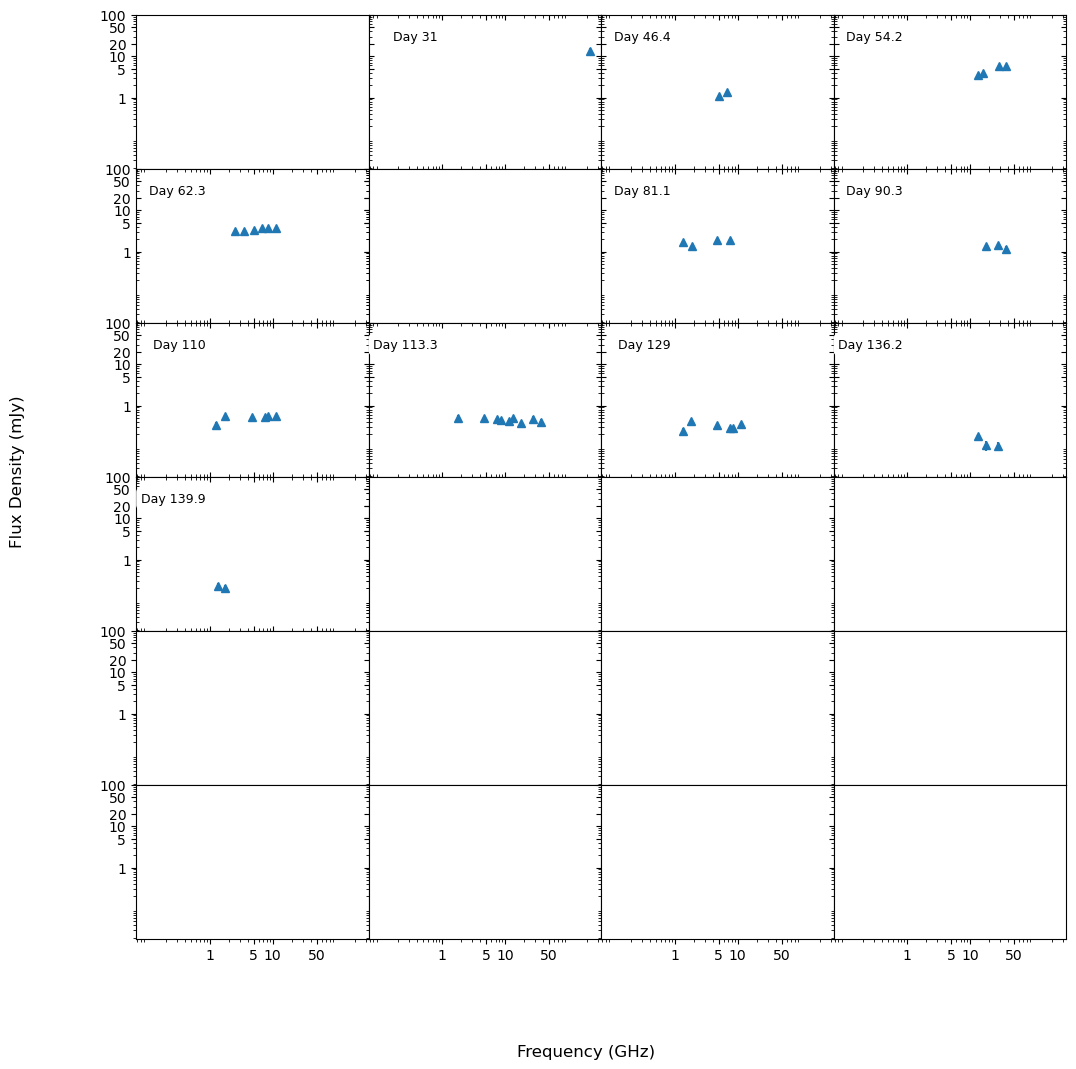

In [6]:

#putting them all in a list
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10,
       df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
       df21, df22, df23, df24]


#the days by the list so they can all be defined
annotations = ['Day 2.4', 'Day 31', 'Day 46.4', 'Day 54.2', 'Day 62.3', 'Day 79.9',
               'Day 81.1', 'Day 90.3', 'Day 110', 'Day 113.3', 'Day 129', 'Day 136.2',
               'Day 139.9', 'Day 193', 'Day 232.8', 'Day 246.6', 'Day 259.7',
               'Day 309.7', 'Day 320.6', 'Day 331.6', 'Day 403.4', 'Day 408.2',
               'Day 488.7', 'Day 492.7']

#making the figure (6,4) is the (rows, columns)
fig, ax = plt.subplots(6, 4, sharex='all', sharey='all')
fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0, wspace=0)

#loop for each of the datasets
for idx, (df, label) in enumerate(zip(dfs, annotations)):
    row, col = divmod(idx, 4)
    mask = df['Flux'] > 3 * df['error'] #don't show the non-detections
    if mask.any():
        ax[row, col].errorbar(df['Freq'][mask], df['Flux'][mask], yerr=df['error'][mask], fmt='^')
        ax[row, col].set_xscale('log')
        ax[row, col].set_yscale('log')
        ax[row, col].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
        ax[row, col].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
        ax[row, col].annotate(label, xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
        ax[row, col].tick_params(axis='both', which='both', direction='in', top=True, right=True)

fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
plt.show();

### Now cleaning it up so it's not using all of those empty plots (the empty plots are due to non-detections)

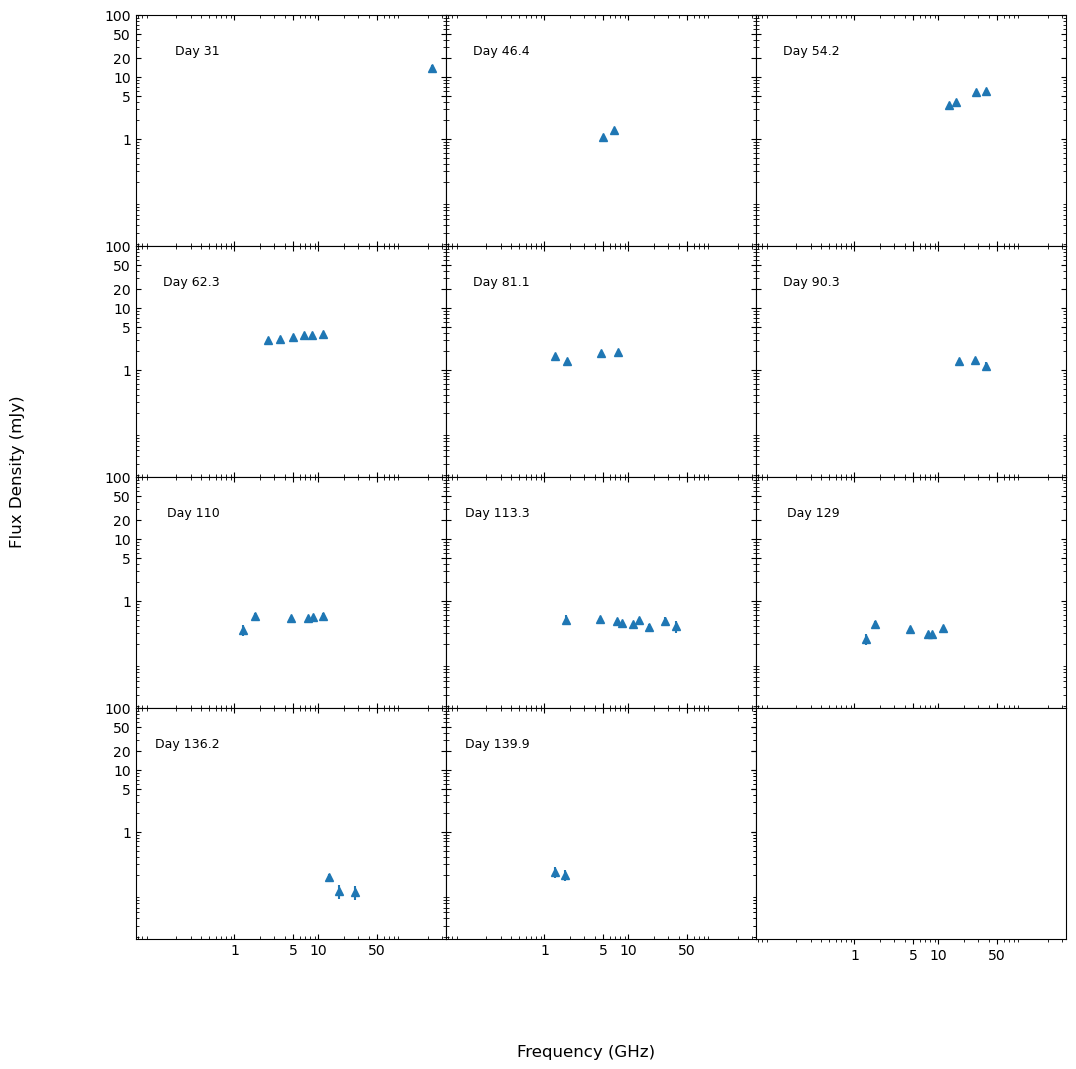

In [7]:
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10,
       df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
       df21, df22, df23, df24]


#the days by the list so they can all be defined
annotations = ['Day 2.4', 'Day 31', 'Day 46.4', 'Day 54.2', 'Day 62.3', 'Day 79.9',
               'Day 81.1', 'Day 90.3', 'Day 110', 'Day 113.3', 'Day 129', 'Day 136.2',
               'Day 139.9', 'Day 193', 'Day 232.8', 'Day 246.6', 'Day 259.7',
               'Day 309.7', 'Day 320.6', 'Day 331.6', 'Day 403.4', 'Day 408.2',
               'Day 488.7', 'Day 492.7']

#making the figure (6,4) is the (rows, columns)
fig, ax = plt.subplots(4, 3, sharex='all', sharey='all')
fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0, wspace=0)

mask = df2['Flux'] > 3 * df2['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0, 0].errorbar(df2['Freq'][mask], df2['Flux'][mask], yerr=df2['error'][mask], fmt='^')
    ax[0, 0].set_xscale('log')
    ax[0, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0, 0].set_yscale('log')
    ax[0, 0].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[0, 0].annotate('Day 31', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df3['Flux'] > 3 * df3['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0, 1].errorbar(df3['Freq'][mask], df3['Flux'][mask], yerr=df3['error'][mask], fmt='^')
    ax[0, 1].set_xscale('log')
    ax[0, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0, 1].set_yscale('log')
    ax[0, 1].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[0, 1].annotate('Day 46.4', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df4['Flux'] > 3 * df4['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0, 2].errorbar(df4['Freq'][mask], df4['Flux'][mask], yerr=df4['error'][mask], fmt='^')
    ax[0, 2].set_xscale('log')
    ax[0, 2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0, 2].set_yscale('log')
    ax[0, 2].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[0, 2].annotate('Day 54.2', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0, 2].tick_params(axis='both', which='both', direction='in', top=True, right=True)



mask = df5['Flux'] > 3 * df5['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1, 0].errorbar(df5['Freq'][mask], df5['Flux'][mask], yerr=df5['error'][mask], fmt='^')
    ax[1, 0].set_xscale('log')
    ax[1, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1, 0].set_yscale('log')
    ax[1, 0].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[1, 0].annotate('Day 62.3', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df7['Flux'] > 3 * df7['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1, 1].errorbar(df7['Freq'][mask], df7['Flux'][mask], yerr=df7['error'][mask], fmt='^')
    ax[1, 1].set_xscale('log')
    ax[1, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1, 1].set_yscale('log')
    ax[1, 1].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[1, 1].annotate('Day 81.1', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df8['Flux'] > 3 * df8['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1, 2].errorbar(df8['Freq'][mask], df8['Flux'][mask], yerr=df8['error'][mask], fmt='^')
    ax[1, 2].set_xscale('log')
    ax[1, 2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1, 2].set_yscale('log')
    ax[1, 2].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[1, 2].annotate('Day 90.3', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1, 2].tick_params(axis='both', which='both', direction='in', top=True, right=True)




mask = df9['Flux'] > 3 * df9['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2, 0].errorbar(df9['Freq'][mask], df9['Flux'][mask], yerr=df9['error'][mask], fmt='^')
    ax[2, 0].set_xscale('log')
    ax[2, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2, 0].set_yscale('log')
    ax[2, 0].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[2, 0].annotate('Day 110', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df10['Flux'] > 3 * df10['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2, 1].errorbar(df10['Freq'][mask], df10['Flux'][mask], yerr=df10['error'][mask], fmt='^')
    ax[2, 1].set_xscale('log')
    ax[2, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2, 1].set_yscale('log')
    ax[2, 1].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[2, 1].annotate('Day 113.3', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df11['Flux'] > 3 * df11['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2, 2].errorbar(df11['Freq'][mask], df11['Flux'][mask], yerr=df11['error'][mask], fmt='^')
    ax[2, 2].set_xscale('log')
    ax[2, 2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2, 2].set_yscale('log')
    ax[2, 2].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[2, 2].annotate('Day 129', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2, 2].tick_params(axis='both', which='both', direction='in', top=True, right=True)



mask = df12['Flux'] > 3 * df12['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3, 0].errorbar(df12['Freq'][mask], df12['Flux'][mask], yerr=df12['error'][mask], fmt='^')
    ax[3, 0].set_xscale('log')
    ax[3, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3, 0].set_yscale('log')
    ax[3, 0].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[3, 0].annotate('Day 136.2', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df13['Flux'] > 3 * df13['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3, 1].errorbar(df13['Freq'][mask], df13['Flux'][mask], yerr=df13['error'][mask], fmt='^')
    ax[3, 1].set_xscale('log')
    ax[3, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3, 1].set_yscale('log')
    ax[3, 1].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[3, 1].annotate('Day 139.9', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)


    
fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
plt.show();

### Making it more defined (getting rid of day 31, and the last empty plot)

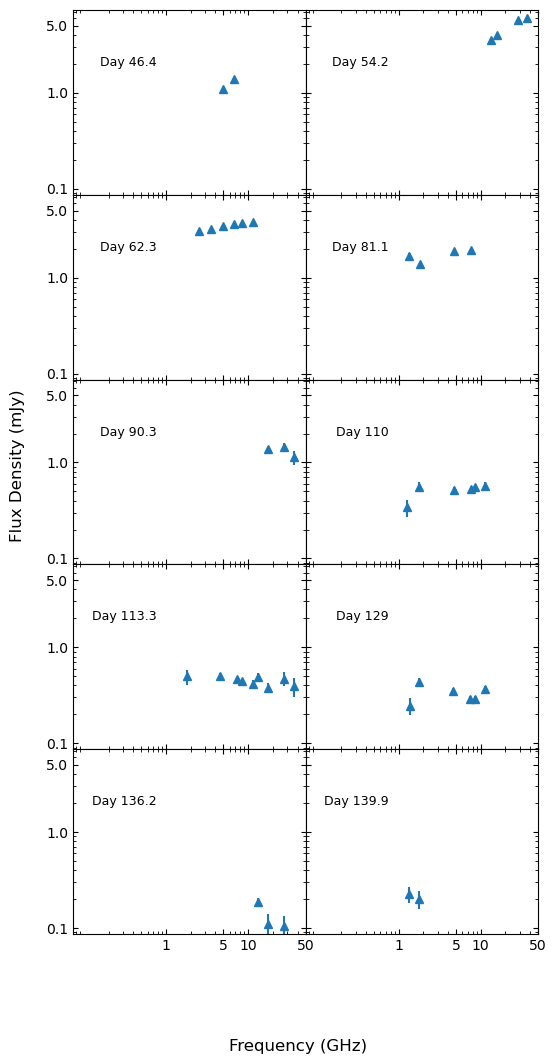

In [8]:
#making the figure (6,4) is the (rows, columns)
fig, ax = plt.subplots(5, 2, sharex='all', sharey='all')
fig.set_size_inches(6, 12)
fig.subplots_adjust(hspace=0, wspace=0)


mask = df3['Flux'] > 3 * df3['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0, 0].errorbar(df3['Freq'][mask], df3['Flux'][mask], yerr=df3['error'][mask], fmt='^')
    ax[0, 0].set_xscale('log')
    ax[0, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0, 0].set_yscale('log')
    ax[0, 0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[0, 0].annotate('Day 46.4', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df4['Flux'] > 3 * df4['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0, 1].errorbar(df4['Freq'][mask], df4['Flux'][mask], yerr=df4['error'][mask], fmt='^')
    ax[0, 1].set_xscale('log')
    ax[0, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0, 1].set_yscale('log')
    ax[0, 1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[0, 1].annotate('Day 54.2', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)



mask = df5['Flux'] > 3 * df5['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1, 0].errorbar(df5['Freq'][mask], df5['Flux'][mask], yerr=df5['error'][mask], fmt='^')
    ax[1, 0].set_xscale('log')
    ax[1, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1, 0].set_yscale('log')
    ax[1, 0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1, 0].annotate('Day 62.3', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df7['Flux'] > 3 * df7['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1, 1].errorbar(df7['Freq'][mask], df7['Flux'][mask], yerr=df7['error'][mask], fmt='^')
    ax[1, 1].set_xscale('log')
    ax[1, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1, 1].set_yscale('log')
    ax[1, 1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1, 1].annotate('Day 81.1', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)



mask = df8['Flux'] > 3 * df8['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2, 0].errorbar(df8['Freq'][mask], df8['Flux'][mask], yerr=df8['error'][mask], fmt='^')
    ax[2, 0].set_xscale('log')
    ax[2, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2, 0].set_yscale('log')
    ax[2, 0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[2, 0].annotate('Day 90.3', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df9['Flux'] > 3 * df9['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2, 1].errorbar(df9['Freq'][mask], df9['Flux'][mask], yerr=df9['error'][mask], fmt='^')
    ax[2, 1].set_xscale('log')
    ax[2, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2, 1].set_yscale('log')
    ax[2, 1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[2, 1].annotate('Day 110', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)



mask = df10['Flux'] > 3 * df10['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3, 0].errorbar(df10['Freq'][mask], df10['Flux'][mask], yerr=df10['error'][mask], fmt='^')
    ax[3, 0].set_xscale('log')
    ax[3, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3, 0].set_yscale('log')
    ax[3, 0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[3, 0].annotate('Day 113.3', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df11['Flux'] > 3 * df11['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3, 1].errorbar(df11['Freq'][mask], df11['Flux'][mask], yerr=df11['error'][mask], fmt='^')
    ax[3, 1].set_xscale('log')
    ax[3, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3, 1].set_yscale('log')
    ax[3, 1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[3, 1].annotate('Day 129', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)



mask = df12['Flux'] > 3 * df12['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4, 0].errorbar(df12['Freq'][mask], df12['Flux'][mask], yerr=df12['error'][mask], fmt='^')
    ax[4, 0].set_xscale('log')
    ax[4, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[4, 0].set_yscale('log')
    ax[4, 0].set_yticks([.1, 1, 5, 10, 20, 50], labels=['0.1','1.0', '5.0', '10.0', '20.0', '50.0'])
    
    ax[4, 0].annotate('Day 136.2', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df13['Flux'] > 3 * df13['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4, 1].errorbar(df13['Freq'][mask], df13['Flux'][mask], yerr=df13['error'][mask], fmt='^')
    ax[4, 1].set_xscale('log')
    ax[4, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[4, 1].set_yscale('log')
    ax[4, 1].set_yticks([.1, 1, 5, 10], labels=['0.1','1.0', '5.0', '10.0'], fontsize=0.01)
    ax[4,1].margins(y=.4)
    ax[4, 1].annotate('Day 139.9', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)


plt.rcParams['ytick.labelsize']= 10
fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
#fig.tight_layout()
plt.show();

### Now plotting the alpha lines using power laws

In [9]:
def error(err, freq, flux):
    yerr = []
    for i in range(len(freq)):
        if freq[i] < 10:
            pl = np.sqrt(err[i]**2 + (flux[i]*0.05)**2)
            yerr.append(pl)
        else:
            pl =np.sqrt(err[i]**2 + (flux[i]*0.1)**2)
            yerr.append(pl)

    return(yerr)



In [10]:
def onedlineneg(x_data, y_data, y_err):

    #LevMarLSQFitter calc uncertainties=True to get covariance matrix and find error on slope
    #Inputting the first point in the x and y data and an estimate on alpha
    PL =  PowerLaw1D(amplitude = y_data[0], x_0= x_data[0], alpha= -1.4,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x_data), max(x_data)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

    fit = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
    fit_model = fit(PL, x_data, y_data)

    #weight is 1/error^2
    y_weight = 1/ (np.power(y_err,2))  

    # fit the data using the uncertainties as weights
    fit_model_weights = fit(PL, x_data, y_data, weights=y_weight)

    return fit_model_weights



In [11]:
#Error on alpha for only two data points
def two_points(Flux, Freq, Err):
    
    alpha = (np.log10(Flux[0]/Flux[1])) / (np.log10(Freq[0]/Freq[1]))
    
    
    der_s1 = 1 / (Flux[0] * np.log(Freq[0]/Freq[1]))
    der_s2 = -1 / (Flux[1] * np.log(Freq[0]/Freq[1]))
    
    
    err_alph_squared = (der_s1)**2 * (Err[0]**2) + (der_s2)**2 * (Err[1]**2) 
    err_alph = np.sqrt(err_alph_squared)
    
    return(alpha, err_alph)

#### Day 46.4

In [12]:

mask = df3['Flux'] > 3 * df3['error']  # apply detection threshold
if mask.any():
    x3 = df3['Freq'][mask].values.tolist()
    y3 = df3['Flux'][mask].values.tolist()
    yerr3 = df3['error'][mask].values.tolist()

In [13]:
yerr3 = error(yerr3, x3, y3)

In [14]:
#Since this day has only two data points, I have to make x_0 fixed in order to run the powerlaw1d. 
#this is done in the code below so I can use the function for the rest of the points



PL3 =  PowerLaw1D(amplitude = y3[0], x_0= x3[0], alpha= -1.4,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model3 = fit(PL3, x3, y3)

    #weight is 1/error^2
y_weight3 = 1/ (np.power(yerr3,2))  

    # fit the data using the uncertainties as weights
fit_model_weights3 = fit(PL3, x3, y3, weights=y_weight3)

fit_model_weights3


<PowerLaw1D(amplitude=1.089, x_0=5., alpha=-0.77255236)>

In [15]:
#Same slope as PL3 
alpha_err3 = two_points(y3,x3,yerr3)
print(alpha_err3)

(np.float64(0.772552360072047), np.float64(0.2516786987792198))


In [16]:
fit.fit_info

{'nfev': 5,
 'fvec': array([0.00000000e+00, 4.11734877e-14]),
 'fjac': array([[-355.60037484,    0.66127336],
        [  52.06857   ,   59.06631191]]),
 'ipvt': array([0, 1], dtype=int32),
 'qtf': array([-1.94867713e-06, -2.21056908e-06]),
 'message': 'The relative error between two consecutive iterates is at most 0.000000',
 'ierr': 2,
 'param_jac': None,
 'param_cov': None,
 'njev': 4,
 'cov_x': array([[1.40535202e-05, 4.19694938e-05],
        [4.19694938e-05, 2.86629107e-04]])}

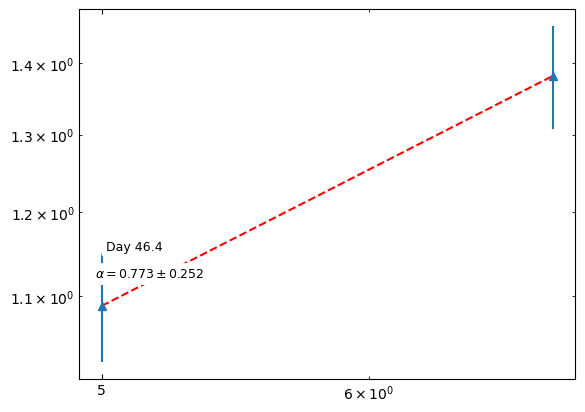

In [17]:
fig,ax = plt.subplots()
mask = df3['Flux'] > 3 * df3['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df3['Freq'][mask], df3['Flux'][mask], yerr=yerr3, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 46.4', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df3['Freq'][mask], fit_model_weights3(df3['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.773 \\pm 0.252}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 54.2

In [18]:
mask = df4['Flux'] > 3 * df4['error']  # apply detection threshold
if mask.any():
    x4 = df4['Freq'][mask].values.tolist()
    y4 = df4['Flux'][mask].values.tolist()
    yerr4 = df4['error'][mask].values.tolist()


In [19]:
yerr4 = error(yerr4, x4, y4)

In [20]:
    #weight is 1/error^2
y_weight4 = 1/ (np.power(yerr4,2))  

PL4 =  PowerLaw1D(amplitude = y4[0], x_0= x4[0], alpha= -1.4,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x4), max(x4)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit4 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model4 = fit4(PL4, x4, y4)



    # fit the data using the uncertainties as weights
fit_model_weights4 = fit4(PL4, x4, y4, weights=y_weight4)

fit_model_weights4

<PowerLaw1D(amplitude=5.20744706, x_0=26.36976019, alpha=-0.55574057)>

In [21]:
fit4.fit_info

{'nfev': 17,
 'fvec': array([ 0.29252968, -0.21822979, -0.9528974 ,  0.74098008]),
 'fjac': array([[-2.35894765e+01, -6.03929791e+00,  6.62572819e-01,
         -2.28953183e-01],
        [-6.03929791e+00, -5.90182729e+00,  6.47490885e-01,
          7.85822871e-01],
        [ 6.62572819e-01,  6.47490885e-01,  5.55111512e-17,
         -0.00000000e+00]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([-5.06118746e-05, -4.94617007e-05,  8.07529965e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 3.90601455e+30,  3.56030082e+31, -2.65892098e+14],
        [ 3.56030082e+31,  3.24518554e+32, -2.42358507e+15],
        [-2.65892098e+14, -2.42358507e+15,  2.17787540e-02]]),
 'njev': 9,
 'cov_x': array([[ 3.90601455e+30,  3.56030082e+31, -2.65892098e+14],
        [ 3.56030082e+31,  3.24518554e+32, -2.42358507e+15],
        [-2.65892098e+14, -2.42358507e+15,  2.17787540e-02

In [22]:
#taking fvec
fvec4 = np.array([ 0.29252968, -0.21822979, -0.9528974 ,  0.74098008])
var4 = np.var(fvec4)


param_cov4 = np.array([[ 3.90601455e+30,  3.56030082e+31, -2.65892098e+14],
        [ 3.56030082e+31,  3.24518554e+32, -2.42358507e+15],
        [-2.65892098e+14, -2.42358507e+15,  2.17787540e-02]])

#This function takes the square root of the diagonal of the matrix 

#The diagonal elements of a covariance matrix are the variances: https://stackoverflow.com/questions/52275542/how-to-calculate-the-standard-error-from-a-variance-covariance-matrix 
#The square root of them are the standard deviations

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag4 = stand(param_cov4*var4) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print(diag4[2]) #Just showing the standard devation on the slope


0.0929123612996143


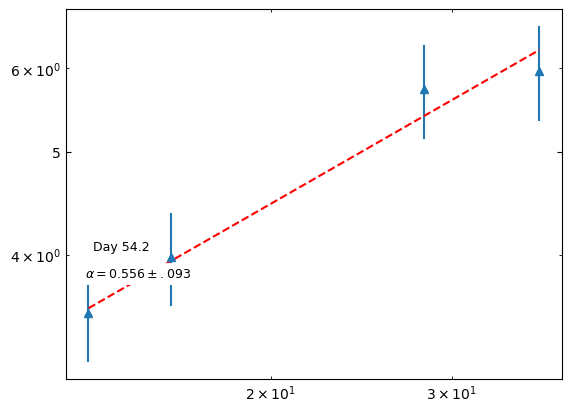

In [23]:


fig,ax = plt.subplots()
mask = df4['Flux'] > 3 * df4['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df4['Freq'][mask], df4['Flux'][mask], yerr=yerr4, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 54.2', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df4['Freq'][mask], fit_model_weights4(df4['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.556 \\pm .093}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 62.3

In [24]:
mask = df5['Flux'] > 3 * df5['error']  # apply detection threshold
if mask.any():
    x5 = df5['Freq'][mask].values.tolist()
    y5 = df5['Flux'][mask].values.tolist()
    yerr5 = df5['error'][mask].values.tolist()


In [25]:
yerr5 = error(yerr5, x5, y5)

In [26]:
PL5 =  PowerLaw1D(amplitude = y5[0], x_0= x5[0], alpha= -1.4,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x5), max(x5)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit5 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model5 = fit5(PL5, x5, y5)

    #weight is 1/error^2
y_weight5 = 1/ (np.power(yerr5,2))  

    # fit the data using the uncertainties as weights
fit_model_weights5 = fit5(PL5, x5, y5, weights=y_weight5)

fit_model_weights5

<PowerLaw1D(amplitude=3.07636957, x_0=2.5, alpha=-0.15214467)>

In [27]:
fit5.fit_info

{'nfev': 38,
 'fvec': array([-0.69682489,  1.393771  , -0.15009848, -1.39349029,  0.62693656,
         0.65080529]),
 'fjac': array([[ 6.81040699e+02, -1.01682926e+02,  8.38094930e+01,
          4.87724517e-01,  5.03866405e-01,  1.44638148e-01],
        [-1.01682926e+02, -2.16968980e+01,  1.78831008e+01,
         -5.48257279e-01, -7.37160939e-01, -2.64981726e-01],
        [ 8.38094930e+01,  1.78831008e+01, -6.28036983e-15,
          8.48528137e-01,  2.82842712e-01,  1.41421356e-01]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([ 5.68505345e-05,  1.21306803e-05, -5.65113293e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[1.72234409e+28, 2.08965572e+28, 1.27424168e+12],
        [2.08965572e+28, 2.53530120e+28, 1.54598981e+12],
        [1.27424168e+12, 1.54598981e+12, 1.43782015e-04]]),
 'njev': 23,
 'cov_x': array([[1.72234409e+28, 2.08965572e+28, 1.27424168e

In [28]:
#taking fvec
fvec5 = np.array([-0.69682489,  1.393771  , -0.15009848, -1.39349029,  0.62693656,
         0.65080529])
var5 = np.var(fvec5)

#taking cov_x
cov_x5 = np.array([[1.72234409e+28, 2.08965572e+28, 1.27424168e+12],
        [2.08965572e+28, 2.53530120e+28, 1.54598981e+12],
        [1.27424168e+12, 1.54598981e+12, 1.43782015e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag5 = stand(cov_x5*var5) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag5[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.011139434010525572


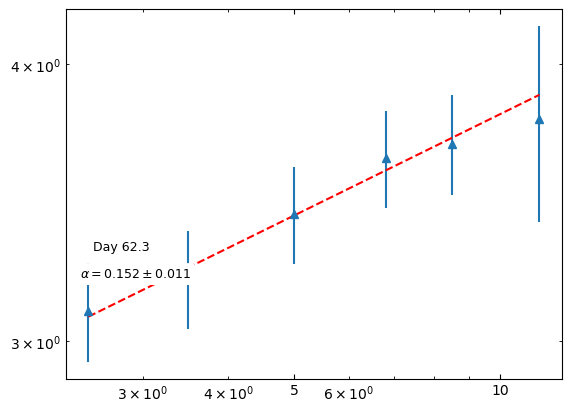

In [29]:



fig,ax = plt.subplots()
mask = df5['Flux'] > 3 * df5['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df5['Freq'][mask], df5['Flux'][mask], yerr=yerr5, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 62.3', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df5['Freq'][mask], fit_model_weights5(df5['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.152 \\pm 0.011}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 81.1

In [30]:
mask = df7['Flux'] > 3 * df7['error']  # apply detection threshold
if mask.any():
    x7 = df7['Freq'][mask].values.tolist()
    y7 = df7['Flux'][mask].values.tolist()
    yerr7 = df7['error'][mask].values.tolist()


In [31]:
yerr7 = error(yerr7, x7, y7)

In [32]:
PL7 =  PowerLaw1D(amplitude = y7[0], x_0= x7[0], alpha= -.1,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x7), max(x7)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit7 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model7 = fit7(PL7, x7, y7)

    #weight is 1/error^2
y_weight7 = 1/ (np.power(yerr7,2))  

    # fit the data using the uncertainties as weights
fit_model_weights7 = fit7(PL7, x7, y7, weights=y_weight7)

fit_model_weights7

<PowerLaw1D(amplitude=1.59299266, x_0=2.58413552, alpha=-0.20036365)>

In [33]:
fit7.fit_info

{'nfev': 16,
 'fvec': array([-13.11199981,  10.57278495, -11.00948483,   5.72341089]),
 'fjac': array([[-2.54942960e+02,  1.30789575e+02, -1.61735413e+01,
         -8.57642980e-01],
        [ 1.30789575e+02, -1.55968315e+02,  1.92871640e+01,
          3.92013927e-01],
        [-1.61735413e+01,  1.92871640e+01, -3.20237283e-15,
         -8.32050294e-01]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([ 7.96608676e-04, -9.49562444e-04,  5.29572584e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[1.49114610e+27, 1.20583589e+28, 4.36862893e+11],
        [1.20583589e+28, 9.75115846e+28, 3.53275212e+12],
        [4.36862893e+11, 3.53275212e+12, 1.54192846e-04]]),
 'njev': 7,
 'cov_x': array([[1.49114610e+27, 1.20583589e+28, 4.36862893e+11],
        [1.20583589e+28, 9.75115846e+28, 3.53275212e+12],
        [4.36862893e+11, 3.53275212e+12, 1.54192846e-04]])}

In [34]:
#taking fvec
fvec7 = np.array([-13.11199981,  10.57278495, -11.00948483,   5.72341089])
var7 = np.var(fvec7)

param_cov7= np.array([[1.49114610e+27, 1.20583589e+28, 4.36862893e+11],
        [1.20583589e+28, 9.75115846e+28, 3.53275212e+12],
        [4.36862893e+11, 3.53275212e+12, 1.54192846e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag7 = stand(param_cov7*var7) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag7[2]) #Just showing the standard devation on the slope

The standard deviation is 0.12759875867303577


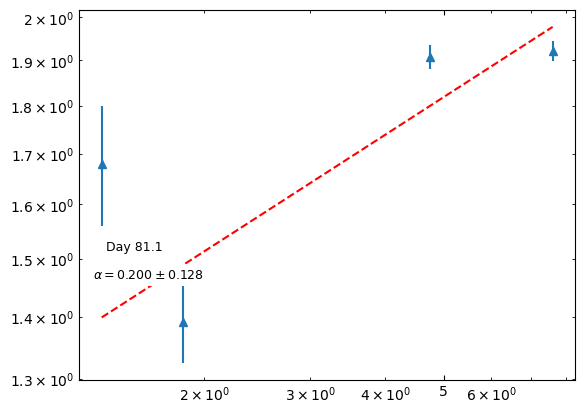

In [35]:
fig,ax = plt.subplots()
mask = df7['Flux'] > 3 * df7['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df7['Freq'][mask], df7['Flux'][mask], yerr=df7['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 81.1', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df7['Freq'][mask], fit_model_weights7(df7['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1  = 0.200 \\pm 0.128}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    #ax.annotate('${\u03B1 2 = 0.02 \\pm 0}$', xy=(90, 60), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
plt.show();

### Day 90.3

In [36]:
mask = df8['Flux'] > 3 * df8['error']  # apply detection threshold
if mask.any():
    x8 = df8['Freq'][mask].values.tolist()
    y8 = df8['Flux'][mask].values.tolist()
    yerr8 = df8['error'][mask].values.tolist()


In [37]:
yerr8 = error(yerr8, x8, y8)

In [38]:
PL8 =  PowerLaw1D(amplitude = y8[0], x_0= x8[0], alpha= .1,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x8), max(x8)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit8 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model8 = fit8(PL8, x8, y8)

    #weight is 1/error^2
y_weight8 = 1/ (np.power(yerr8,2))  

    # fit the data using the uncertainties as weights
fit_model_weights8 = fit8(PL8, x8, y8, weights=y_weight8)

fit_model_weights8

<PowerLaw1D(amplitude=1.36238442, x_0=20.68737228, alpha=0.13802844)>

In [39]:
fit8.fit_info

{'nfev': 10,
 'fvec': array([ 0.74430799, -3.1148969 ,  2.44731592]),
 'fjac': array([[-4.79864026e+01,  2.89017318e+00, -4.34768964e-01],
        [ 2.89017318e+00,  1.86233822e+01, -1.70611910e-16],
        [-4.34768964e-01, -6.14551948e-17, -8.66711738e-18]]),
 'ipvt': array([0, 2, 1], dtype=int32),
 'qtf': array([ 9.53978401e-07, -4.08675693e-04, -4.03062430e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': None,
 'njev': 4,
 'cov_x': array([[ 1.09277645e+30, -1.20612129e+32, -3.98007291e+14],
        [-1.20612129e+32,  1.33122248e+34,  4.39289362e+16],
        [-3.98007291e+14,  4.39289362e+16,  1.47844105e-01]])}

In [40]:
#taking fvec
fvec8 = np.array([ 0.74430799, -3.1148969 ,  2.44731592])
var8 = np.var(fvec8)


param_cov8 = np.array([[ 1.09277645e+30, -1.20612129e+32, -3.98007291e+14],
        [-1.20612129e+32,  1.33122248e+34,  4.39289362e+16],
        [-3.98007291e+14,  4.39289362e+16,  1.47844105e-01]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag8 = stand(param_cov8) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag8[2]) #Just showing the standard devation on the slope

The standard deviation is 0.3845050129712225


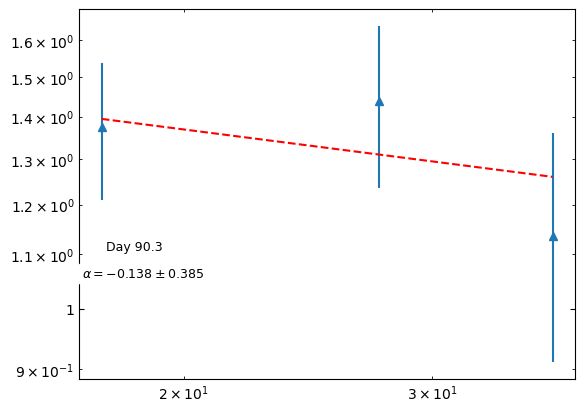

In [41]:


fig,ax = plt.subplots()
mask = df8['Flux'] > 3 * df8['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df8['Freq'][mask], df8['Flux'][mask], yerr=yerr8, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 90.3', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df8['Freq'][mask], fit_model_weights8(df8['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.138 \\pm 0.385}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 110

In [42]:
mask = df9['Flux'] > 3 * df9['error']  # apply detection threshold
if mask.any():
    x9 = df9['Freq'][mask].values.tolist()
    y9 = df9['Flux'][mask].values.tolist()
    yerr9 = df9['error'][mask].values.tolist()

#need two for this one?
print(x9)

print(y9)

print(yerr9)

[1.2555, 1.7715, 4.74, 7.59, 8.53, 11.38]
[0.34, 0.56, 0.521, 0.528, 0.556, 0.571]
[0.071, 0.072, 0.033, 0.025, 0.031, 0.06]


In [43]:
yerr9 = error(yerr9, x9, y9)

In [44]:


PL9 =  PowerLaw1D(amplitude = y9[0], x_0= x9[0], alpha= -1.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit9 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model9 = fit9(PL9, x9, y9)


#weight is 1/error^2
y_weight9 = 1/ (np.power(yerr9, 2))  

# fit the data using the uncertainties as weights
fit_model_weights9 = fit9(PL9, x9, y9, weights=y_weight9)

fit_model_weights9


<PowerLaw1D(amplitude=0.84486011, x_0=326.7591545, alpha=-0.11934235)>

In [45]:
fit9.fit_info

{'nfev': 32,
 'fvec': array([ 17.83016487, -17.88168451,  -6.34947989,   8.50156847,
         -5.30316615,  -0.73698273]),
 'fjac': array([[-2.36801767e+03, -7.15122711e+02,  2.20664360e-01,
          6.48099736e-01,  4.85525131e-01,  1.16959938e-01],
        [-7.15122711e+02,  6.72446827e+01, -2.07495925e-02,
         -6.15007743e-01, -6.33001407e-01, -2.67302487e-01],
        [ 2.20664360e-01, -2.07495925e-02, -2.70694691e-17,
          8.33093737e-01,  2.56336534e-01, -9.61262004e-02]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([-9.51631712e-04, -4.31971036e-04,  1.94247861e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[1.29940272e+26, 4.21106696e+29, 6.41238877e+10],
        [4.21106696e+29, 1.36471047e+33, 2.07810851e+14],
        [6.41238877e+10, 2.07810851e+14, 5.19912455e-05]]),
 'njev': 23,
 'cov_x': array([[1.29940272e+26, 4.21106696e+29, 6.412

In [46]:
#taking fvec
fvec9 = np.array([ 17.83016487, -17.88168451,  -6.34947989,   8.50156847,
         -5.30316615,  -0.73698273])
var9 = np.var(fvec9)


param_cov9 = np.array([[1.29940272e+26, 4.21106696e+29, 6.41238877e+10],
        [4.21106696e+29, 1.36471047e+33, 2.07810851e+14],
        [6.41238877e+10, 2.07810851e+14, 5.19912455e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2]) #error 1
    #sd4 = np.sqrt(diag[3]) #error 2
    return(sd1,sd2,sd3)

diag9 = stand(param_cov9*var9) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation 1 is", diag9[2])#, 'the second is', diag9[3]) #Just showing the standard devation on the slope


The standard deviation 1 is 0.08201929299485404


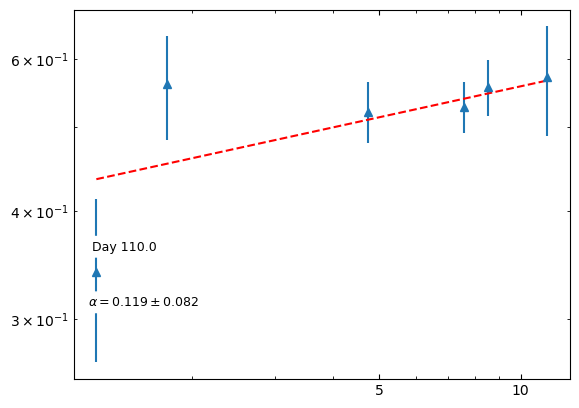

In [47]:
fig,ax = plt.subplots()
mask = df9['Flux'] > 3 * df9['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df9['Freq'][mask], df9['Flux'][mask], yerr=yerr9, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 110.0', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df9['Freq'][mask], fit_model_weights9(df9['Freq'][mask]), 'r--')
    #ax.annotate('${\u03B1 1 = 1.22 \\pm 0}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.annotate('${\u03B1  = 0.119 \\pm 0.082}$', xy=(90, 60), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
plt.show();

#### Day 113.3

In [48]:
mask = df10['Flux'] > 3 * df10['error']  # apply detection threshold
if mask.any():
    x10 = df10['Freq'][mask].values.tolist()
    y10 = df10['Flux'][mask].values.tolist()
    yerr10 = df10['error'][mask].values.tolist()


In [49]:
yerr10 = error(yerr10, x10, y10)

In [50]:
PL10 =  PowerLaw1D(amplitude = y10[0], x_0= x10[0], alpha= -.2,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x10), max(x10)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit10 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model10 = fit10(PL10, x10, y10)

    #weight is 1/error^2
y_weight10 = 1/ (np.power(yerr10,2))  

    # fit the data using the uncertainties as weights
fit_model_weights10 = fit10(PL10, x10, y10, weights=y_weight10)

fit_model_weights10

<PowerLaw1D(amplitude=0.41609816, x_0=15.55049262, alpha=0.13623982)>

In [51]:
fit10.fit_info

{'nfev': 17,
 'fvec': array([-16.59718272,   7.70244769, -10.14011599,  -2.19409562,
          7.31781032,  -5.62485455,  -7.31297795,   9.35560296,
          5.51391956]),
 'fjac': array([[-1.72594306e+03, -5.05428965e+02, -6.29190515e+00,
          5.78457265e-02,  9.29550312e-02,  3.83546752e-01,
          5.45655755e-01,  6.75154458e-01,  2.03503732e-01],
        [-5.05428965e+02,  2.33542203e+02,  1.84311059e-14,
          2.64967743e-01, -4.34467050e-01, -6.99196192e-01,
         -1.78505560e-01,  6.95785025e-02,  2.00633260e-01],
        [-6.29190515e+00, -2.07486001e-16,  1.00386101e-15,
         -2.86161126e-03,  1.15287470e-01,  4.49932382e-01,
          1.92783285e-03,  8.84010902e-01, -2.16680864e-03]]),
 'ipvt': array([0, 2, 1], dtype=int32),
 'qtf': array([ 5.11041540e-04,  3.69222288e-08, -1.95837481e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 1.31

In [52]:
#taking fvec
fvec10 = np.array([-16.59718272,   7.70244769, -10.14011599,  -2.19409562,
          7.31781032,  -5.62485455,  -7.31297795,   9.35560296,
          5.51391956])
var10 = np.var(fvec10)


param_cov10= np.array([[ 1.31875533e+25, -3.61749988e+27, -3.21389699e+09],
        [-3.61749988e+27,  9.92322463e+29,  8.81609478e+11],
        [-3.21389699e+09,  8.81609478e+11,  1.91177565e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag10 = stand(param_cov10*var10) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag10[2]) #Just showing the standard devation on the slope


The standard deviation is 0.038092058059872674


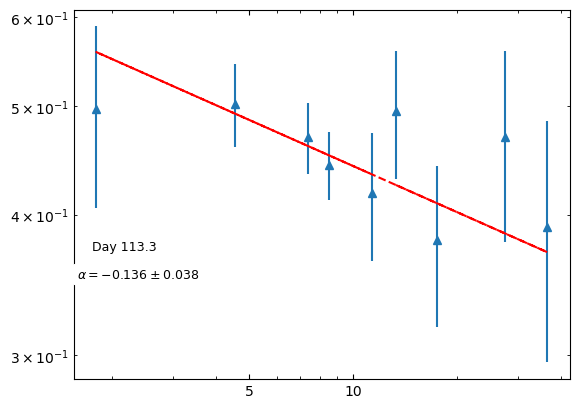

In [53]:

fig,ax = plt.subplots()
mask = df10['Flux'] > 3 * df10['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df10['Freq'][mask], df10['Flux'][mask], yerr=yerr10, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 113.3', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df10['Freq'][mask], fit_model_weights10(df10['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.136 \\pm 0.038}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

### Day 129

In [54]:
mask = df11['Flux'] > 3 * df11['error']  # apply detection threshold
if mask.any():
    x11 = df11['Freq'][mask].values.tolist()
    y11 = df11['Flux'][mask].values.tolist()
    yerr11 = df11['error'][mask].values.tolist()

#need two for this one?
print(x11)

print(y11)

print(yerr11)

[1.36, 1.78, 4.608, 7.458, 8.5, 11.4]
[0.244, 0.431, 0.347, 0.292, 0.289, 0.368]
[0.049, 0.048, 0.028, 0.016, 0.018, 0.031]


In [55]:
yerr11 = error(yerr11, x11, y11)

In [56]:

PL11 =  PowerLaw1D(amplitude = y11[0], x_0= x11[0], alpha= 1.4,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x11), max(x11)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit11 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model11 = fit11(PL11, x11, y11)

    #weight is 1/error^2
y_weight11 = 1/ (np.power(yerr11,2))  

    # fit the data using the uncertainties as weights
fit_model_weights11 = fit11(PL11, x11, y11, weights=y_weight11)

fit_model_weights11

<PowerLaw1D(amplitude=0.34160598, x_0=1.59882625, alpha=0.08982225)>

In [57]:
fit11.fit_info

{'nfev': 21,
 'fvec': array([ 40.24033202, -33.47486624, -33.52678226,  11.66975944,
          9.38627989, -35.26615219]),
 'fjac': array([[-2.67845654e+03,  1.35881238e+03, -5.14035023e+01,
          6.92977930e-01,  6.03076678e-01,  1.35173543e-01],
        [ 1.35881238e+03, -3.29553154e+02,  1.29203449e-13,
         -5.15547668e-01, -6.67639866e-01, -2.59812415e-01],
        [-5.14035023e+01, -9.81423682e-15,  9.31109476e-15,
          4.52307133e-01,  7.42172723e-01,  3.41460567e-02]]),
 'ipvt': array([0, 2, 1], dtype=int32),
 'qtf': array([2.40500347e-03, 2.79178538e-04, 5.49465917e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 4.24829550e+24, -2.21363806e+26,  6.59231078e+09],
        [-2.21363806e+26,  1.15344929e+28, -3.43502236e+11],
        [ 6.59231078e+09, -3.43502236e+11,  1.94373019e-05]]),
 'njev': 12,
 'cov_x': array([[ 4.24829550e+24, -2.21363806e+2

In [58]:
#taking fvec
fvec11 = np.array([ 40.24033202, -33.47486624, -33.52678226,  11.66975944,
          9.38627989, -35.26615219])
var11 = np.var(fvec11)


param_cov11= np.array([[ 4.24829550e+24, -2.21363806e+26,  6.59231078e+09],
        [-2.21363806e+26,  1.15344929e+28, -3.43502236e+11],
        [ 6.59231078e+09, -3.43502236e+11,  1.94373019e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag11 = stand(param_cov11*var11) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag11[2]) #Just showing the standard devation on the slope


The standard deviation is 0.12793183423595939


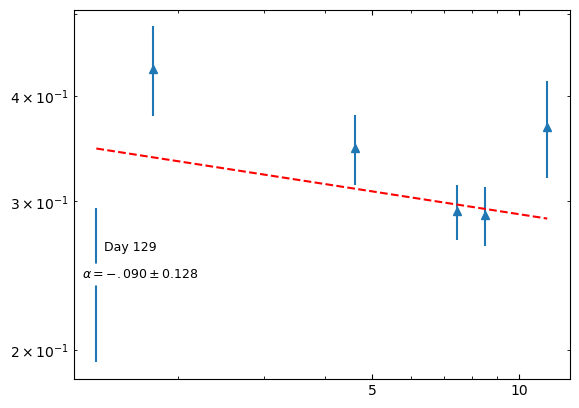

In [59]:


fig,ax = plt.subplots()
mask = df11['Flux'] > 3 * df11['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df11['Freq'][mask], df11['Flux'][mask], yerr=yerr11, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 129', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df11['Freq'][mask], fit_model_weights11(df11['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = -.090 \\pm 0.128}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

### Day 136.2

In [60]:
mask = df12['Flux'] > 3 * df12['error']  # apply detection threshold
if mask.any():
    x12 = df12['Freq'][mask].values.tolist()
    y12 = df12['Flux'][mask].values.tolist()
    yerr12 = df12['error'][mask].values.tolist()

print(x12)

print(y12)

print(yerr12)


[13.3, 17.45, 27.5]
[0.188, 0.11, 0.106]
[0.019, 0.029, 0.027]


In [61]:
yerr12 = error(yerr12, x12, y12)

In [62]:
PL12 =  PowerLaw1D(amplitude = y12[0], x_0= x12[0], alpha= 2,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x12), max(x12)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit12 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model12 = fit12(PL12, x12, y12)

    #weight is 1/error^2
y_weight12 = 1/ (np.power(yerr12,2))  

    # fit the data using the uncertainties as weights
fit_model_weights12 = fit12(PL12, x12, y12, weights=y_weight12)

fit_model_weights12

<PowerLaw1D(amplitude=0.17979278, x_0=13.3, alpha=0.90988234)>

In [63]:
fit12.fit_info

{'nfev': 13,
 'fvec': array([-11.48763362,  31.63113194, -15.64478137]),
 'fjac': array([[-1.70935968e+03,  5.06190513e+01, -2.13125793e+01],
        [ 5.06190513e+01,  7.51263997e+01, -5.37915963e-12],
        [-2.13125793e+01,  1.28202658e-15, -3.31333402e-15]]),
 'ipvt': array([0, 2, 1], dtype=int32),
 'qtf': array([-6.27907526e-04,  7.87192648e-04,  3.71113651e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': None,
 'njev': 6,
 'cov_x': array([[ 1.41603723e+25, -1.13572220e+27,  1.93810172e+10],
        [-1.13572220e+27,  9.10897605e+28, -1.55444017e+12],
        [ 1.93810172e+10, -1.55444017e+12,  2.03706470e-04]])}

In [64]:
#taking fvec
fvec12 = np.array([-11.48763362,  31.63113194, -15.64478137])
var12 = np.var(fvec12)

#taking cov_x
cov_x12 = np.array([[ 1.41603723e+25, -1.13572220e+27,  1.93810172e+10],
        [-1.13572220e+27,  9.10897605e+28, -1.55444017e+12],
        [ 1.93810172e+10, -1.55444017e+12,  2.03706470e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag12 = stand(cov_x12*var12) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances
print('The error/standard deviation is', diag12[2]) #Just showing the standard deviation on the slope

The error/standard deviation is 0.30505802585230724


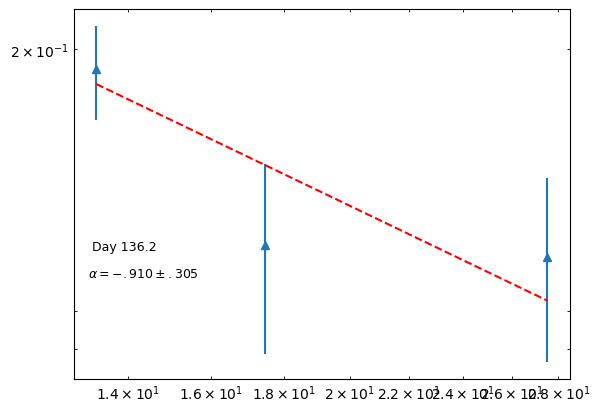

In [65]:


fig,ax = plt.subplots()
mask = df12['Flux'] > 3 * df12['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df12['Freq'][mask], df12['Flux'][mask], yerr=yerr12, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 136.2', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df12['Freq'][mask], fit_model_weights12(df12['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = -.910 \\pm .305}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

### Day 139.9

In [66]:
mask = df13['Flux'] > 3 * df13['error']  # apply detection threshold
if mask.any():
    x13 = df13['Freq'][mask].values.tolist()
    y13 = df13['Flux'][mask].values.tolist()
    yerr13 = df13['error'][mask].values.tolist()

In [67]:
yerr13 = error(yerr13, x13, y13)

In [68]:
#Since this day has only two data points, I have to make x_0 fixed in order to run the powerlaw1d. 
#this is done in the code below so I can use the function for the rest of the points



PL13 =  PowerLaw1D(amplitude = y13[0], x_0= x13[0], alpha= -1.4,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model13 = fit(PL13, x13, y13)

    #weight is 1/error^2
y_weight13 = 1/ (np.power(yerr13,2))  

    # fit the data using the uncertainties as weights
fit_model_weights13 = fit(PL13, x13, y13, weights=y_weight13)

fit_model_weights13


<PowerLaw1D(amplitude=0.225, x_0=1.33, alpha=0.394665)>

In [69]:
fit12.fit_info

{'nfev': 13,
 'fvec': array([-11.48763362,  31.63113194, -15.64478137]),
 'fjac': array([[-1.70935968e+03,  5.06190513e+01, -2.13125793e+01],
        [ 5.06190513e+01,  7.51263997e+01, -5.37915963e-12],
        [-2.13125793e+01,  1.28202658e-15, -3.31333402e-15]]),
 'ipvt': array([0, 2, 1], dtype=int32),
 'qtf': array([-6.27907526e-04,  7.87192648e-04,  3.71113651e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': None,
 'njev': 6,
 'cov_x': array([[ 1.41603723e+25, -1.13572220e+27,  1.93810172e+10],
        [-1.13572220e+27,  9.10897605e+28, -1.55444017e+12],
        [ 1.93810172e+10, -1.55444017e+12,  2.03706470e-04]])}

In [70]:
#taking fvec
fvec12 = np.array([-11.48763362,  31.63113194, -15.64478137])
var12 = np.var(fvec12)

#taking cov_x
cov_x12 = np.array([[ 1.41603723e+25, -1.13572220e+27,  1.93810172e+10],
        [-1.13572220e+27,  9.10897605e+28, -1.55444017e+12],
        [ 1.93810172e+10, -1.55444017e+12,  2.03706470e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag12 = stand(cov_x12*var12) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag12[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.30505802585230724


In [71]:
two_points(y13, x13, yerr13)

(np.float64(-0.3946649952020133), np.float64(1.0314718791047546))

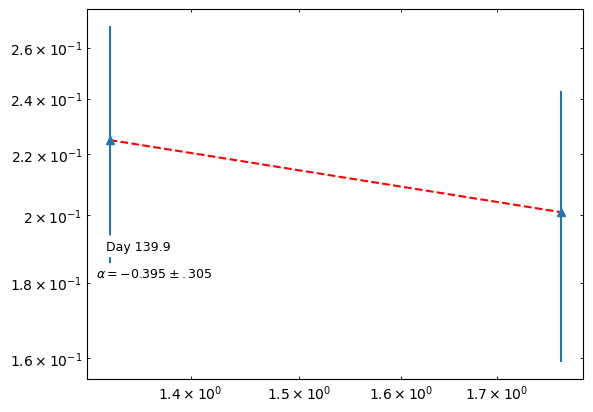

In [72]:
fig,ax = plt.subplots()
mask = df13['Flux'] > 3 * df13['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df13['Freq'][mask], df13['Flux'][mask], yerr=df13['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 139.9', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df13['Freq'][mask], fit_model_weights13(df13['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.395 \\pm .305}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

## Now to put all of them together into one big plot

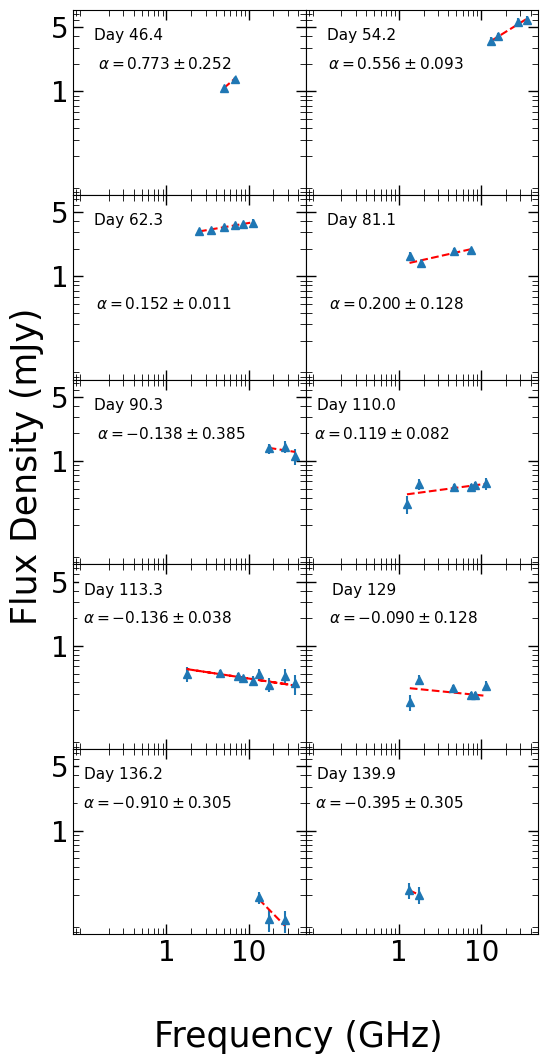

In [77]:
#making the figure (5,2) is the (rows, columns)
fig, ax = plt.subplots(5, 2, sharex='all', sharey='all')
fig.set_size_inches(6, 12)
fig.subplots_adjust(hspace=0, wspace=0)

mask = df3['Flux'] > 3 * df3['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,0].errorbar(df3['Freq'][mask], df3['Flux'][mask], yerr=yerr3, fmt='^')
    ax[0,0].set_xscale('log')
    ax[0,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize = 20)
    ax[0,0].set_yscale('log')
    ax[0,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'], fontsize = 20)
    ax[0,0].annotate('Day 46.4', xy=(65, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[0,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[0,0].plot(df3['Freq'][mask], fit_model_weights3(df3['Freq'][mask]), 'r--')
    ax[0,0].annotate('${\u03B1 = 0.773 \\pm 0.252}$', xy=(114, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df4['Flux'] > 3 * df4['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,1].errorbar(df4['Freq'][mask], df4['Flux'][mask], yerr=yerr4, fmt='^')
    ax[0,1].set_xscale('log')
    ax[0,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize = 20)
    ax[0,1].set_yscale('log')
    ax[0,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'], fontsize = 20)
    ax[0,1].annotate('Day 54.2', xy=(65, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[0,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[0,1].plot(df4['Freq'][mask], fit_model_weights4(df4['Freq'][mask]), 'r--')
    ax[0,1].annotate('${\u03B1 = 0.556 \\pm 0.093}$', xy=(114, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df5['Flux'] > 3 * df5['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,0].errorbar(df5['Freq'][mask], df5['Flux'][mask], yerr=yerr5, fmt='^')
    ax[1,0].set_xscale('log')
    ax[1,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize = 20)
    ax[1,0].set_yscale('log')
    ax[1,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'], fontsize = 20)
    ax[1,0].annotate('Day 62.3', xy=(65, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[1,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[1,0].plot(df5['Freq'][mask], fit_model_weights5(df5['Freq'][mask]), 'r--')
    ax[1,0].annotate('${\u03B1 = 0.152 \\pm 0.011}$', xy=(114, 60), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df7['Flux'] > 3 * df7['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,1].errorbar(df7['Freq'][mask], df7['Flux'][mask], yerr=yerr7, fmt='^')
    ax[1,1].set_xscale('log')
    ax[1,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize = 20)
    ax[1,1].set_yscale('log')
    ax[1,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'], fontsize = 20)
    ax[1,1].annotate('Day 81.1', xy=(65, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[1,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[1,1].plot(df7['Freq'][mask], fit_model_weights7(df7['Freq'][mask]), 'r--')
    ax[1,1].annotate('${\u03B1 = 0.200 \\pm 0.128}$', xy=(114, 60), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    #ax[1,1].annotate('${\u03B1 2 = 0.02 \\pm 0}$', xy=(90, 40), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df8['Flux'] > 3 * df8['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,0].errorbar(df8['Freq'][mask], df8['Flux'][mask], yerr=yerr8, fmt='^')
    ax[2,0].set_xscale('log')
    ax[2,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize = 20)
    ax[2,0].set_yscale('log')
    ax[2,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'], fontsize = 20)
    ax[2,0].annotate('Day 90.3', xy=(65, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[2,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[2,0].plot(df8['Freq'][mask], fit_model_weights8(df8['Freq'][mask]), 'r--')
    ax[2,0].annotate('${\u03B1 = -0.138 \\pm 0.385}$', xy=(124, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df9['Flux'] > 3 * df9['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,1].errorbar(df9['Freq'][mask], df9['Flux'][mask], yerr=yerr9, fmt='^')
    ax[2,1].set_xscale('log')
    ax[2,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize = 20)
    ax[2,1].set_yscale('log')
    ax[2,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'], fontsize = 20)
    ax[2,1].annotate('Day 110.0', xy=(65, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[2,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[2,1].plot(df9['Freq'][mask], fit_model_weights9(df9['Freq'][mask]), 'r--')
    ax[2,1].annotate('${\u03B1 = 0.119 \\pm 0.082}$', xy=(104, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    #ax[2,1].annotate('${\u03B1 2 = 0.06 \\pm 0}$', xy=(84, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df10['Flux'] > 3 * df10['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3,0].errorbar(df10['Freq'][mask], df10['Flux'][mask], yerr=yerr10, fmt='^')
    ax[3,0].set_xscale('log')
    ax[3,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize = 20)
    ax[3,0].set_yscale('log')
    ax[3,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'], fontsize = 20)
    ax[3,0].annotate('Day 113.3', xy=(65, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[3,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[3,0].plot(df10['Freq'][mask], fit_model_weights10(df10['Freq'][mask]), 'r--')
    #ax[3,0].annotate('${\u03B1 1 = 0.07 \\pm 0}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,0].annotate('${\u03B1 = -0.136 \\pm 0.038}$', xy=(114, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df11['Flux'] > 3 * df11['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3,1].errorbar(df11['Freq'][mask], df11['Flux'][mask], yerr=yerr11, fmt='^')
    ax[3,1].set_xscale('log')
    ax[3,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize = 20)
    ax[3,1].set_yscale('log')
    ax[3,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'], fontsize = 20)
    ax[3,1].annotate('Day 129', xy=(65, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[3,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[3,1].plot(df11['Freq'][mask], fit_model_weights11(df11['Freq'][mask]), 'r--')
    ax[3,1].annotate('${\u03B1 = -0.090 \\pm 0.128}$', xy=(124, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df12['Flux'] > 3 * df12['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4,0].errorbar(df12['Freq'][mask], df12['Flux'][mask], yerr=yerr12, fmt='^')
    ax[4,0].set_xscale('log')
    ax[4,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize = 20)
    ax[4,0].set_yscale('log')
    ax[4,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'], fontsize = 20)
    ax[4,0].annotate('Day 136.2', xy=(65, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[4,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[4,0].plot(df12['Freq'][mask], fit_model_weights12(df12['Freq'][mask]), 'r--')
    ax[4,0].annotate('${\u03B1 = -0.910 \\pm 0.305}$', xy=(114, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df13['Flux'] > 3 * df13['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4,1].errorbar(df13['Freq'][mask], df13['Flux'][mask], yerr=yerr13, fmt='^')
    ax[4,1].set_xscale('log')
    ax[4,1].set_xticks([1, 10, 50], labels=['1', '10', '50'], fontsize = 20)
    ax[4,1].set_yscale('log')
    ax[4,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'], fontsize = 20)
    ax[4,1].annotate('Day 139.9', xy=(65, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[4,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[4,1].plot(df13['Freq'][mask], fit_model_weights13(df13['Freq'][mask]), 'r--')
    ax[4,1].annotate('${\u03B1 = -0.395 \\pm 0.305}$', xy=(114, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


plt.rcParams['ytick.labelsize']= 20
fig.supxlabel("Frequency (GHz)", fontsize = 25)
fig.supylabel("Flux Density (mJy)", fontsize =25)
plt.savefig("V5589_SI.png")
#fig.tight_layout()
plt.show();